# Import Libraries

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
from sodapy import Socrata

import seaborn as sns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


**Import Census Data**

This is a chloropleth and point pattern analysis on Census Data for race.

In [2]:
gdf = gpd.read_file('data/acs2019_5yr_B03002_14000US06037534001.geojson')

# Week 3 Lab

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
gdf.sample()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1775,14000US06037553801,"Census Tract 5538.01, Los Angeles, CA",4954.0,392.0,725.0,192.0,49.0,36.0,468.0,147.0,0.0,12.0,39.0,31.0,138.0,130.0,22.0,34.0,9.0,14.0,0.0,12.0,9.0,14.0,4229.0,462.0,1740.0,565.0,9.0,13.0,0.0,12.0,0.0,12.0,0.0,12.0,2470.0,699.0,10.0,15.0,0.0,12.0,10.0,15.0,"MULTIPOLYGON (((-118.17749 33.89516, -118.1774..."


In [5]:
gdf.geoid.head()

0          05000US06037
1    14000US06037101110
2    14000US06037101122
3    14000US06037101210
4    14000US06037101220
Name: geoid, dtype: object

In [6]:
# drop the row with index 0 (i.e. the first row)
gdf = gdf.drop([0])

In [7]:
list(gdf)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [9]:
# columns to keep
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [10]:
gdf = gdf[columns_to_keep]

In [11]:
# check the slimmed down gdf
gdf.head()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,62.0,297.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [12]:
list(gdf)

['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [13]:
gdf.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [14]:
gdf.sample()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
1946,14000US06037600303,"Census Tract 6003.03, Los Angeles, CA",3883.0,1398.0,73.0,1297.0,0.0,2.0,0.0,0.0,26.0,2485.0,"MULTIPOLYGON (((-118.30030 33.93283, -118.3002..."


In [15]:
# access a single column like df['col_name']
gdf['Total'].head()

1    4283.0
2    3405.0
3    6347.0
4    3702.0
5    3884.0
Name: Total, dtype: float64

In [16]:
# get some stats
gdf['Total'].describe()

count     2346.000000
mean      4297.344416
std       1587.065962
min          0.000000
25%       3203.750000
50%       4211.500000
75%       5314.000000
max      12463.000000
Name: Total, dtype: float64

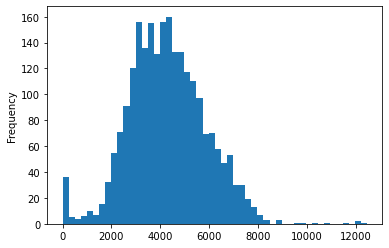

In [17]:
# plot it as a historgram with 50 bins
gdf['Total'].plot.hist(bins=50)

In [18]:
gdf_sorted = gdf.sort_values(by='Total',ascending = False)

In [19]:
# display the data, but just a few columns to keep it clean
gdf_sorted[['geoid','Total']].head(10)

,geoid,Total
2198,14000US06037901004,12463.0
923,14000US06037275602,12100.0
848,14000US06037265301,11977.0
2236,14000US06037910705,11613.0
2206,14000US06037901205,10783.0
2275,14000US06037920037,10318.0
2147,14000US06037702901,9852.0
994,14000US06037300600,9609.0
532,14000US06037206020,8947.0
2192,14000US06037900803,8751.0


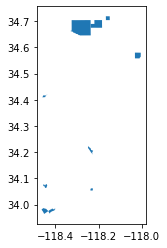

In [20]:
# plot it
gdf_sorted.head(10).plot()

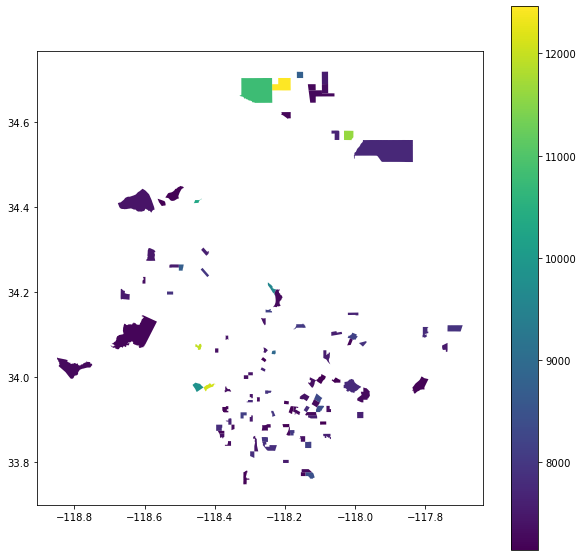

In [21]:
# Make it prettier
gdf_sorted.head(100).plot(figsize=(10,10),column='Total',legend=True)

In [22]:
gdf[gdf['Total']==0]

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
1055,14000US06037320000,"Census Tract 3200, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.36215 34.13903, -118.3612..."
2318,14000US06037980001,"Census Tract 9800.01, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.37031 34.20120, -118.3658..."
2319,14000US06037980002,"Census Tract 9800.02, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.25753 33.80197, -118.2571..."
2320,14000US06037980003,"Census Tract 9800.03, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.14019 34.78468, -118.1401..."
2321,14000US06037980004,"Census Tract 9800.04, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.12795 34.64591, -118.1274..."
2322,14000US06037980005,"Census Tract 9800.05, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.35210 33.85818, -118.3517..."
2323,14000US06037980006,"Census Tract 9800.06, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.09420 33.78670, -118.0941..."
2324,14000US06037980007,"Census Tract 9800.07, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.11512 33.76305, -118.1135..."
2328,14000US06037980013,"Census Tract 9800.13, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.39627 33.92804, -118.3962..."
2331,14000US06037980018,"Census Tract 9800.18, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.18066 33.80597, -118.1806..."


In [23]:
# create a new variable for census tracts with zero pop
gdf_no_pop = gdf[gdf['Total']==0]

In [24]:
print('There are ' + str(len(gdf_no_pop)) + ' census tracts with no people in them')

There are 19 census tracts with no people in them


In [25]:
# display it
gdf_no_pop[['geoid','Total']]

,geoid,Total
1055,14000US06037320000,0.0
2318,14000US06037980001,0.0
2319,14000US06037980002,0.0
2320,14000US06037980003,0.0
2321,14000US06037980004,0.0
2322,14000US06037980005,0.0
2323,14000US06037980006,0.0
2324,14000US06037980007,0.0
2328,14000US06037980013,0.0
2331,14000US06037980018,0.0


In [26]:
# output columns
list(gdf)

['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [33]:
gdf['Percent Non Hispanic'] = gdf['Non Hispanic']/gdf['Total']*100
gdf['Percent Hispanic'] = gdf['Hispanic']/gdf['Total']*100
gdf['Percent Non Hispanic White'] = gdf['Non Hispanic White']/gdf['Total']*100
gdf['Percent Non Hispanic Black'] = gdf['Non Hispanic Black']/gdf['Total']*100
gdf['Percent Non Hispanic American Indian and Alaska Native'] = gdf['Non Hispanic American Indian and Alaska Native']/gdf['Total']*100
gdf['Non Hispanic Asian'] = gdf['Non Hispanic Asian']/gdf['Total']*100
gdf['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] = gdf['Non Hispanic Native Hawaiian and Other Pacific Islander']/gdf['Total']*100
gdf['Non Hispanic Some other race'] = gdf['Non Hispanic Some other race']/gdf['Total']*100
gdf['Non Hispanic Two or more races'] = gdf['Non Hispanic Two or more races']/gdf['Total']*100

In [28]:
gdf.sample(5)

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry,Percent Non Hispanic,Percent Hispanic
1931,14000US06037577100,"Census Tract 5771, Los Angeles, CA",7185.0,5281.0,3883.0,477.0,0.0,595.0,0.0,0.0,326.0,1904.0,"MULTIPOLYGON (((-118.15459 33.76849, -118.1545...",73.500348,26.499652
266,14000US06037132502,"Census Tract 1325.02, Los Angeles, CA",3922.0,2489.0,1822.0,206.0,0.0,372.0,0.0,19.0,70.0,1433.0,"MULTIPOLYGON (((-118.55350 34.19383, -118.5524...",63.462519,36.537481
1223,14000US06037407801,"Census Tract 4078.01, Los Angeles, CA",5727.0,1780.0,178.0,60.0,8.0,1385.0,0.0,102.0,47.0,3947.0,"MULTIPOLYGON (((-117.92726 34.02677, -117.9271...",31.080845,68.919155
1939,14000US06037577604,"Census Tract 5776.04, Los Angeles, CA",1367.0,1121.0,954.0,26.0,0.0,109.0,0.0,0.0,32.0,246.0,"MULTIPOLYGON (((-118.12002 33.76119, -118.1199...",82.004389,17.995611
2151,14000US06037703200,"Census Tract 7032, Los Angeles, CA",5688.0,5243.0,340.0,4601.0,0.0,157.0,0.0,52.0,93.0,445.0,"MULTIPOLYGON (((-118.34931 34.00126, -118.3493...",92.176512,7.823488


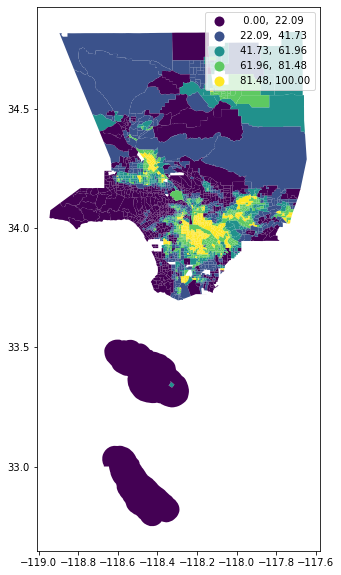

In [29]:
gdf.plot(figsize=(12,10),
                 column='Percent Hispanic',
                 legend=True, 
                 scheme='NaturalBreaks')

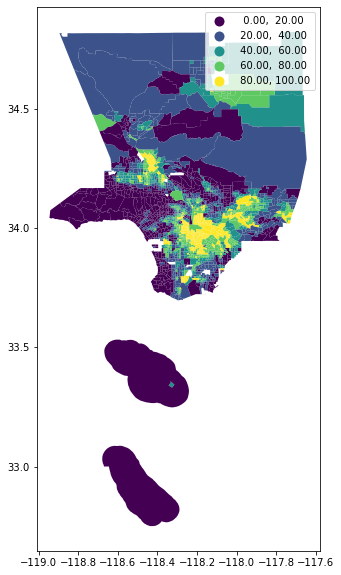

In [30]:
gdf.plot(figsize=(12,10),
                 column='Percent Hispanic',
                 legend=True, 
                 scheme='equal_interval')

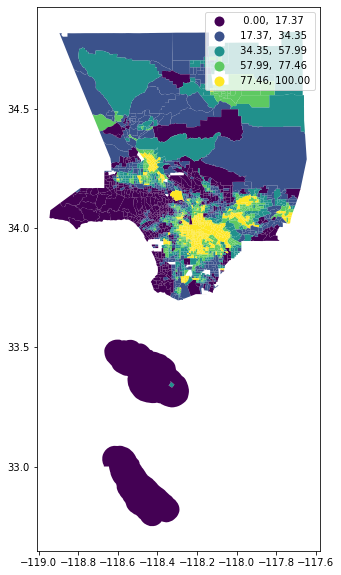

In [31]:
gdf.plot(figsize=(12,10),
                 column='Percent Hispanic',
                 legend=True, 
                 scheme='quantiles')

Text(0.5, 1.0, 'Percent Non Hispanic Black')

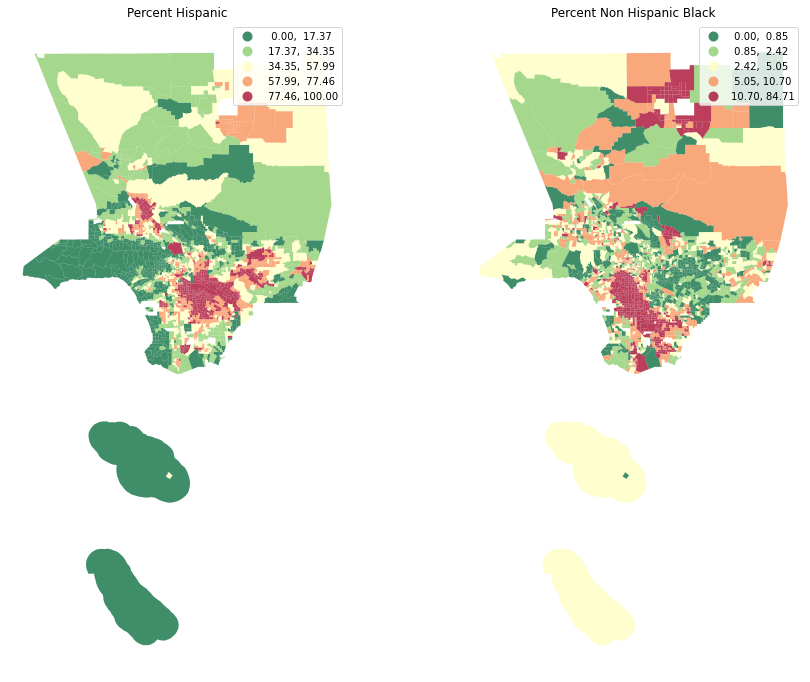

In [34]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
gdf.plot(column='Percent Hispanic', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Hispanic")

# spatial lag map on the right
gdf.plot(column='Percent Non Hispanic Black', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Non Hispanic Black")

In [35]:
gdf[gdf['Percent Hispanic'] > 80]

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry,Percent Non Hispanic,Percent Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Native Hawaiian and Other Pacific Islander
18,14000US06037104108,"Census Tract 1041.08, Los Angeles, CA",6001.0,1019.0,327.0,430.0,0.0,3.382770,13.0,0.000000,0.766539,4982.0,"MULTIPOLYGON (((-118.40853 34.27071, -118.4065...",16.980503,83.019497,5.449092,7.165472,0.000000,0.216631
20,14000US06037104201,"Census Tract 1042.01, Los Angeles, CA",4569.0,488.0,56.0,401.0,31.0,0.000000,0.0,0.000000,0.000000,4081.0,"MULTIPOLYGON (((-118.42402 34.28533, -118.4232...",10.680674,89.319326,1.225651,8.776538,0.678485,0.000000
21,14000US06037104203,"Census Tract 1042.03, Los Angeles, CA",5441.0,624.0,82.0,446.0,0.0,1.249770,0.0,0.367579,0.147032,4817.0,"MULTIPOLYGON (((-118.41799 34.27964, -118.4170...",11.468480,88.531520,1.507076,8.197023,0.000000,0.000000
23,14000US06037104310,"Census Tract 1043.10, Los Angeles, CA",4962.0,218.0,68.0,96.0,8.0,0.362757,0.0,0.342604,0.221685,4744.0,"MULTIPOLYGON (((-118.44011 34.26727, -118.4399...",4.393390,95.606610,1.370415,1.934704,0.161225,0.000000
24,14000US06037104320,"Census Tract 1043.20, Los Angeles, CA",5292.0,574.0,139.0,244.0,2.0,1.095994,0.0,1.228269,1.247166,4718.0,"MULTIPOLYGON (((-118.42876 34.27236, -118.4285...",10.846561,89.153439,2.626606,4.610733,0.037793,0.000000
25,14000US06037104401,"Census Tract 1044.01, Los Angeles, CA",3270.0,115.0,65.0,14.0,0.0,1.100917,0.0,0.000000,0.000000,3155.0,"MULTIPOLYGON (((-118.44088 34.26705, -118.4401...",3.516820,96.483180,1.987768,0.428135,0.000000,0.000000
26,14000US06037104403,"Census Tract 1044.03, Los Angeles, CA",3341.0,150.0,15.0,0.0,0.0,4.040706,0.0,0.000000,0.000000,3191.0,"MULTIPOLYGON (((-118.44327 34.26662, -118.4431...",4.489674,95.510326,0.448967,0.000000,0.000000,0.000000
27,14000US06037104404,"Census Tract 1044.04, Los Angeles, CA",3084.0,217.0,80.0,62.0,0.0,2.172503,0.0,0.000000,0.259403,2867.0,"MULTIPOLYGON (((-118.43527 34.26176, -118.4336...",7.036316,92.963684,2.594034,2.010376,0.000000,0.000000
28,14000US06037104500,"Census Tract 1045, Los Angeles, CA",3025.0,34.0,25.0,1.0,4.0,0.000000,0.0,0.000000,0.132231,2991.0,"MULTIPOLYGON (((-118.43212 34.25878, -118.4313...",1.123967,98.876033,0.826446,0.033058,0.132231,0.000000
29,14000US06037104610,"Census Tract 1046.10, Los Angeles, CA",3386.0,95.0,66.0,0.0,14.0,0.000000,0.0,0.000000,0.443001,3291.0,"MULTIPOLYGON (((-118.42461 34.26426, -118.4238...",2.805670,97.194330,1.949203,0.000000,0.413467,0.000000


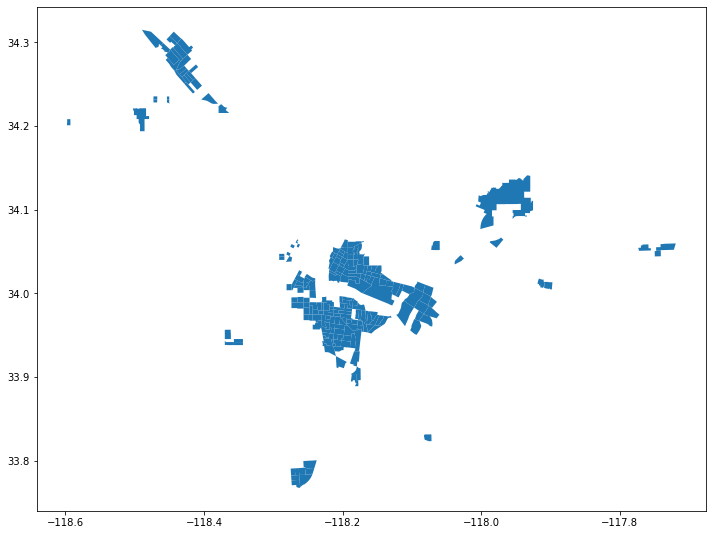

In [36]:
gdf[gdf['Percent Hispanic'] > 90].plot(figsize=(12,10))

In [37]:
# reproject to Web Mercator
gdf_web_mercator = gdf.to_crs(epsg=3857)

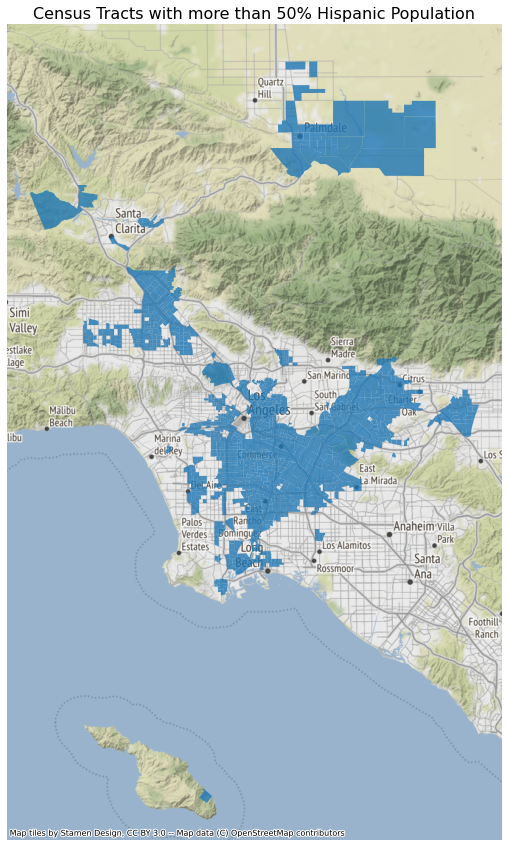

In [38]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['Percent Hispanic'] > 50].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with more than 50% Hispanic Population',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

# Point Pattern Analysis

In [40]:
def getXY(pt):
    return (pt.x, pt.y)
centroidseries = gdf['geometry'].centroid
centroidseries 

<ipython-input-40-c8c601d1b2a5>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroidseries = gdf['geometry'].centroid


1       POINT (-118.29299 34.25947)
2       POINT (-118.29015 34.26772)
3       POINT (-118.29073 34.25297)
4       POINT (-118.28163 34.25161)
5       POINT (-118.27100 34.24877)
6       POINT (-118.29416 34.24285)
7       POINT (-118.35419 34.22508)
8       POINT (-118.34540 34.21619)
9       POINT (-118.34927 34.20988)
10      POINT (-118.33801 34.24047)
11      POINT (-118.30789 34.27324)
12      POINT (-118.30739 34.26338)
13      POINT (-118.34023 34.27335)
14      POINT (-118.35548 34.25738)
15      POINT (-118.31397 34.25484)
16      POINT (-118.39258 34.28210)
17      POINT (-118.40469 34.27615)
18      POINT (-118.39857 34.27315)
19      POINT (-118.37483 34.28728)
20      POINT (-118.41610 34.28650)
21      POINT (-118.41155 34.27906)
22      POINT (-118.39546 34.28935)
23      POINT (-118.42928 34.27637)
24      POINT (-118.42025 34.27313)
25      POINT (-118.43272 34.26704)
26      POINT (-118.43449 34.25879)
27      POINT (-118.42869 34.26392)
28      POINT (-118.42575 34

In [41]:
gdf['geometry points'] = centroidseries

In [54]:
list(gdf)

['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry',
 'Percent Non Hispanic',
 'Percent Hispanic',
 'Percent Non Hispanic White',
 'Percent Non Hispanic Black',
 'Percent Non Hispanic American Indian and Alaska Native',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander',
 'geometry points']

In [55]:
gdf.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry',
 'Percent Non Hispanic',
 'Percent Hispanic',
 'Percent Non Hispanic White',
 'Percent Non Hispanic Black',
 'Percent Non Hispanic American Indian and Alaska Native',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander',
 'geometry points']

In [58]:
columns_to_keep2 = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'Percent Non Hispanic',
 'Percent Hispanic',
 'Percent Non Hispanic White',
 'Percent Non Hispanic Black',
 'Percent Non Hispanic American Indian and Alaska Native',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander',
 'geometry points']
gdf = gdf[columns_to_keep2]

In [59]:
gdf.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'Percent Non Hispanic',
 'Percent Hispanic',
 'Percent Non Hispanic White',
 'Percent Non Hispanic Black',
 'Percent Non Hispanic American Indian and Alaska Native',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander',
 'geometry']

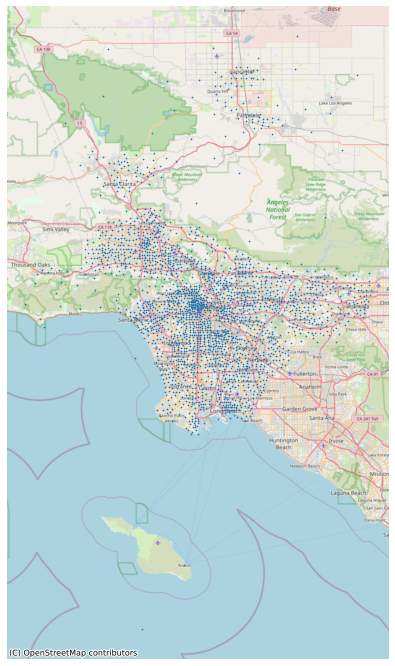

In [62]:
gdf = gpd.GeoDataFrame(gdf)
gdf=gdf.to_crs('EPSG:3857')
ax = gdf.plot(figsize=(12,12), markersize=0.5)
ax.axis('off')
ctx.add_basemap(ax,source=ctx.providers.OpenStreetMap.Mapnik)

In [78]:
lvls = {'Non Hispanic White': 'White',
 'Non Hispanic Black': 'Black',
 'Non Hispanic American Indian and Alaska Native': 'American Indian or Alaska Native',
 'Non Hispanic Asian': 'Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander': 'Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race': 'Other',
 'Non Hispanic Two or more races': 'Two or more races',
 'Hispanic': 'Hispanic'}

In [79]:
gdf['majority']=gdf[[
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic']].idxmax(axis = 1).map(lvls)

In [80]:
gdf.majority.value_counts()

Hispanic                            1450
White                                819
Black                                 72
Asian                                  3
American Indian or Alaska Native       2
Name: majority, dtype: int64

In [81]:
gdf.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,Percent Non Hispanic,Percent Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,geometry,majority
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,7.728228,3.0,0.186785,2.685034,1188.0,72.262433,27.737567,61.078683,0.443614,0.070044,0.070044,POINT (-13168315.067 4063696.435),White
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,6.461087,0.0,0.000000,1.967695,147.0,95.682819,4.317181,84.640235,2.173275,0.440529,0.000000,POINT (-13167998.945 4064807.386),White
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,7.657161,0.0,0.740507,0.220577,2616.0,58.783677,41.216323,47.045848,3.119584,0.000000,0.000000,POINT (-13168063.933 4062820.829),White
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,9.211237,0.0,0.000000,2.647218,1364.0,63.155051,36.844949,48.946515,2.350081,0.000000,0.000000,POINT (-13167051.132 4062637.118),White
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,4.994851,0.0,0.000000,1.596292,297.0,92.353244,7.646756,80.484037,5.278064,0.000000,0.000000,POINT (-13165867.264 4062255.399),White


In [82]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [83]:
toggle = gdf.majority.unique().tolist()

In [93]:
@interact
def race_by(majority = toggle):
    ax = gdf[gdf.majority == majority].plot(figsize=(36,36), markersize=6)
    ax.axis('off')
    ctx.add_basemap(ax,
                crs='epsg:3857',
                source=ctx.providers.OpenStreetMap.Mapnik)

interactive(children=(Dropdown(description='majority', options=('White', 'Hispanic', 'Black', 'American Indian…